# Assignment 2 - Epipolar Geometry and 3D Reconstruction 

First name: Nalet
<br>
Last name: Meinen
<br>
Matriculation number: 13-463-955

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from data import load_homogeneous_coordinates
from utils import eight_points_algorithm, right_epipole, plot_epipolar_line

## Part I: The Eight Point Algorithm

### Load Data

In [2]:
data_dir = './merton_college/'
img1, img2, x1, x2 = load_homogeneous_coordinates(data_dir)

### Estimate the fundamental matrix F

In [3]:
F = eight_points_algorithm(x1, x2, normalize=False) 
#F = eight_points_algorithm(x1, x2) 
assert np.linalg.matrix_rank(F) == 2
print('Estimated fundamental matrix: ')
print(F)

Estimated fundamental matrix: 
[[-1.30618344e-08  6.88941970e-06 -2.83695005e-03]
 [-2.31090865e-06  3.04908449e-07  2.40431701e-02]
 [ 9.63317340e-04 -2.56634571e-02  9.99376974e-01]]


### Plot epipoles and epipolar lines

In [4]:
# compute the epipole
# TODO: implement this function
e = right_epipole(F)  

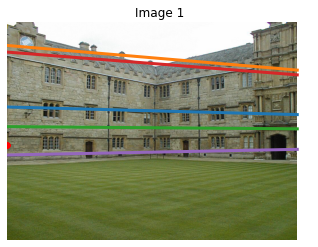

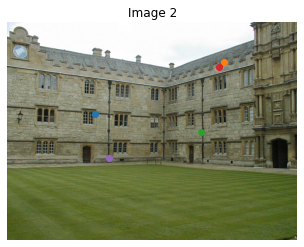

In [5]:
plt.figure()
plt.imshow(img1)
plt.title('Image 1')

# plot each line individually, this gives nice colors
for i in range(100, 105): 
    plot_epipolar_line(img1, F.T, x2[:, i], e)

plt.axis('off')
plt.figure()
plt.imshow(img2)
plt.title('Image 2')

# plot each point individually, this gives same colors as the lines 
for i in range(100, 105):
    plt.plot(x2[0, i], x2[1, i], 'o')
    plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

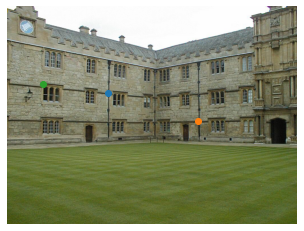

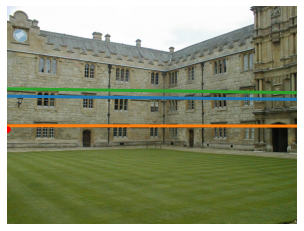

In [6]:
#%matplotlib widget
# from ipywidgets import *

# fig, ax = plt.subplots()
# ax.imshow(img1)

# fig2, ax2 = plt.subplots()
# ax2.imshow(img2)

# def onclick(event):
#     ax.plot(event.xdata, event.ydata, 'o')
#     plot_epipolar_line(img2, F, np.array([event.xdata, event.ydata, 1]), e, ax2)
#     ax2.imshow(img2)

# cid = fig.canvas.mpl_connect('button_press_event', onclick)

##################################################################################
# interactive plot did not work in jupiter lab, so we choose the points manually #
##################################################################################

fig, ax = plt.subplots()
ax.imshow(img1)
plt.plot(357, 305, 'o')
plt.plot(675, 404, 'o')
plt.plot(126, 272, 'o')
plt.axis('off')


fig2, ax2 = plt.subplots()

plot_epipolar_line(img2, F, np.array([357, 305, 1]), e)
plot_epipolar_line(img2, F, np.array([675, 404, 1]), e)
plot_epipolar_line(img2, F, np.array([126, 272, 1]), e)
ax2.imshow(img2)
plt.axis('off')

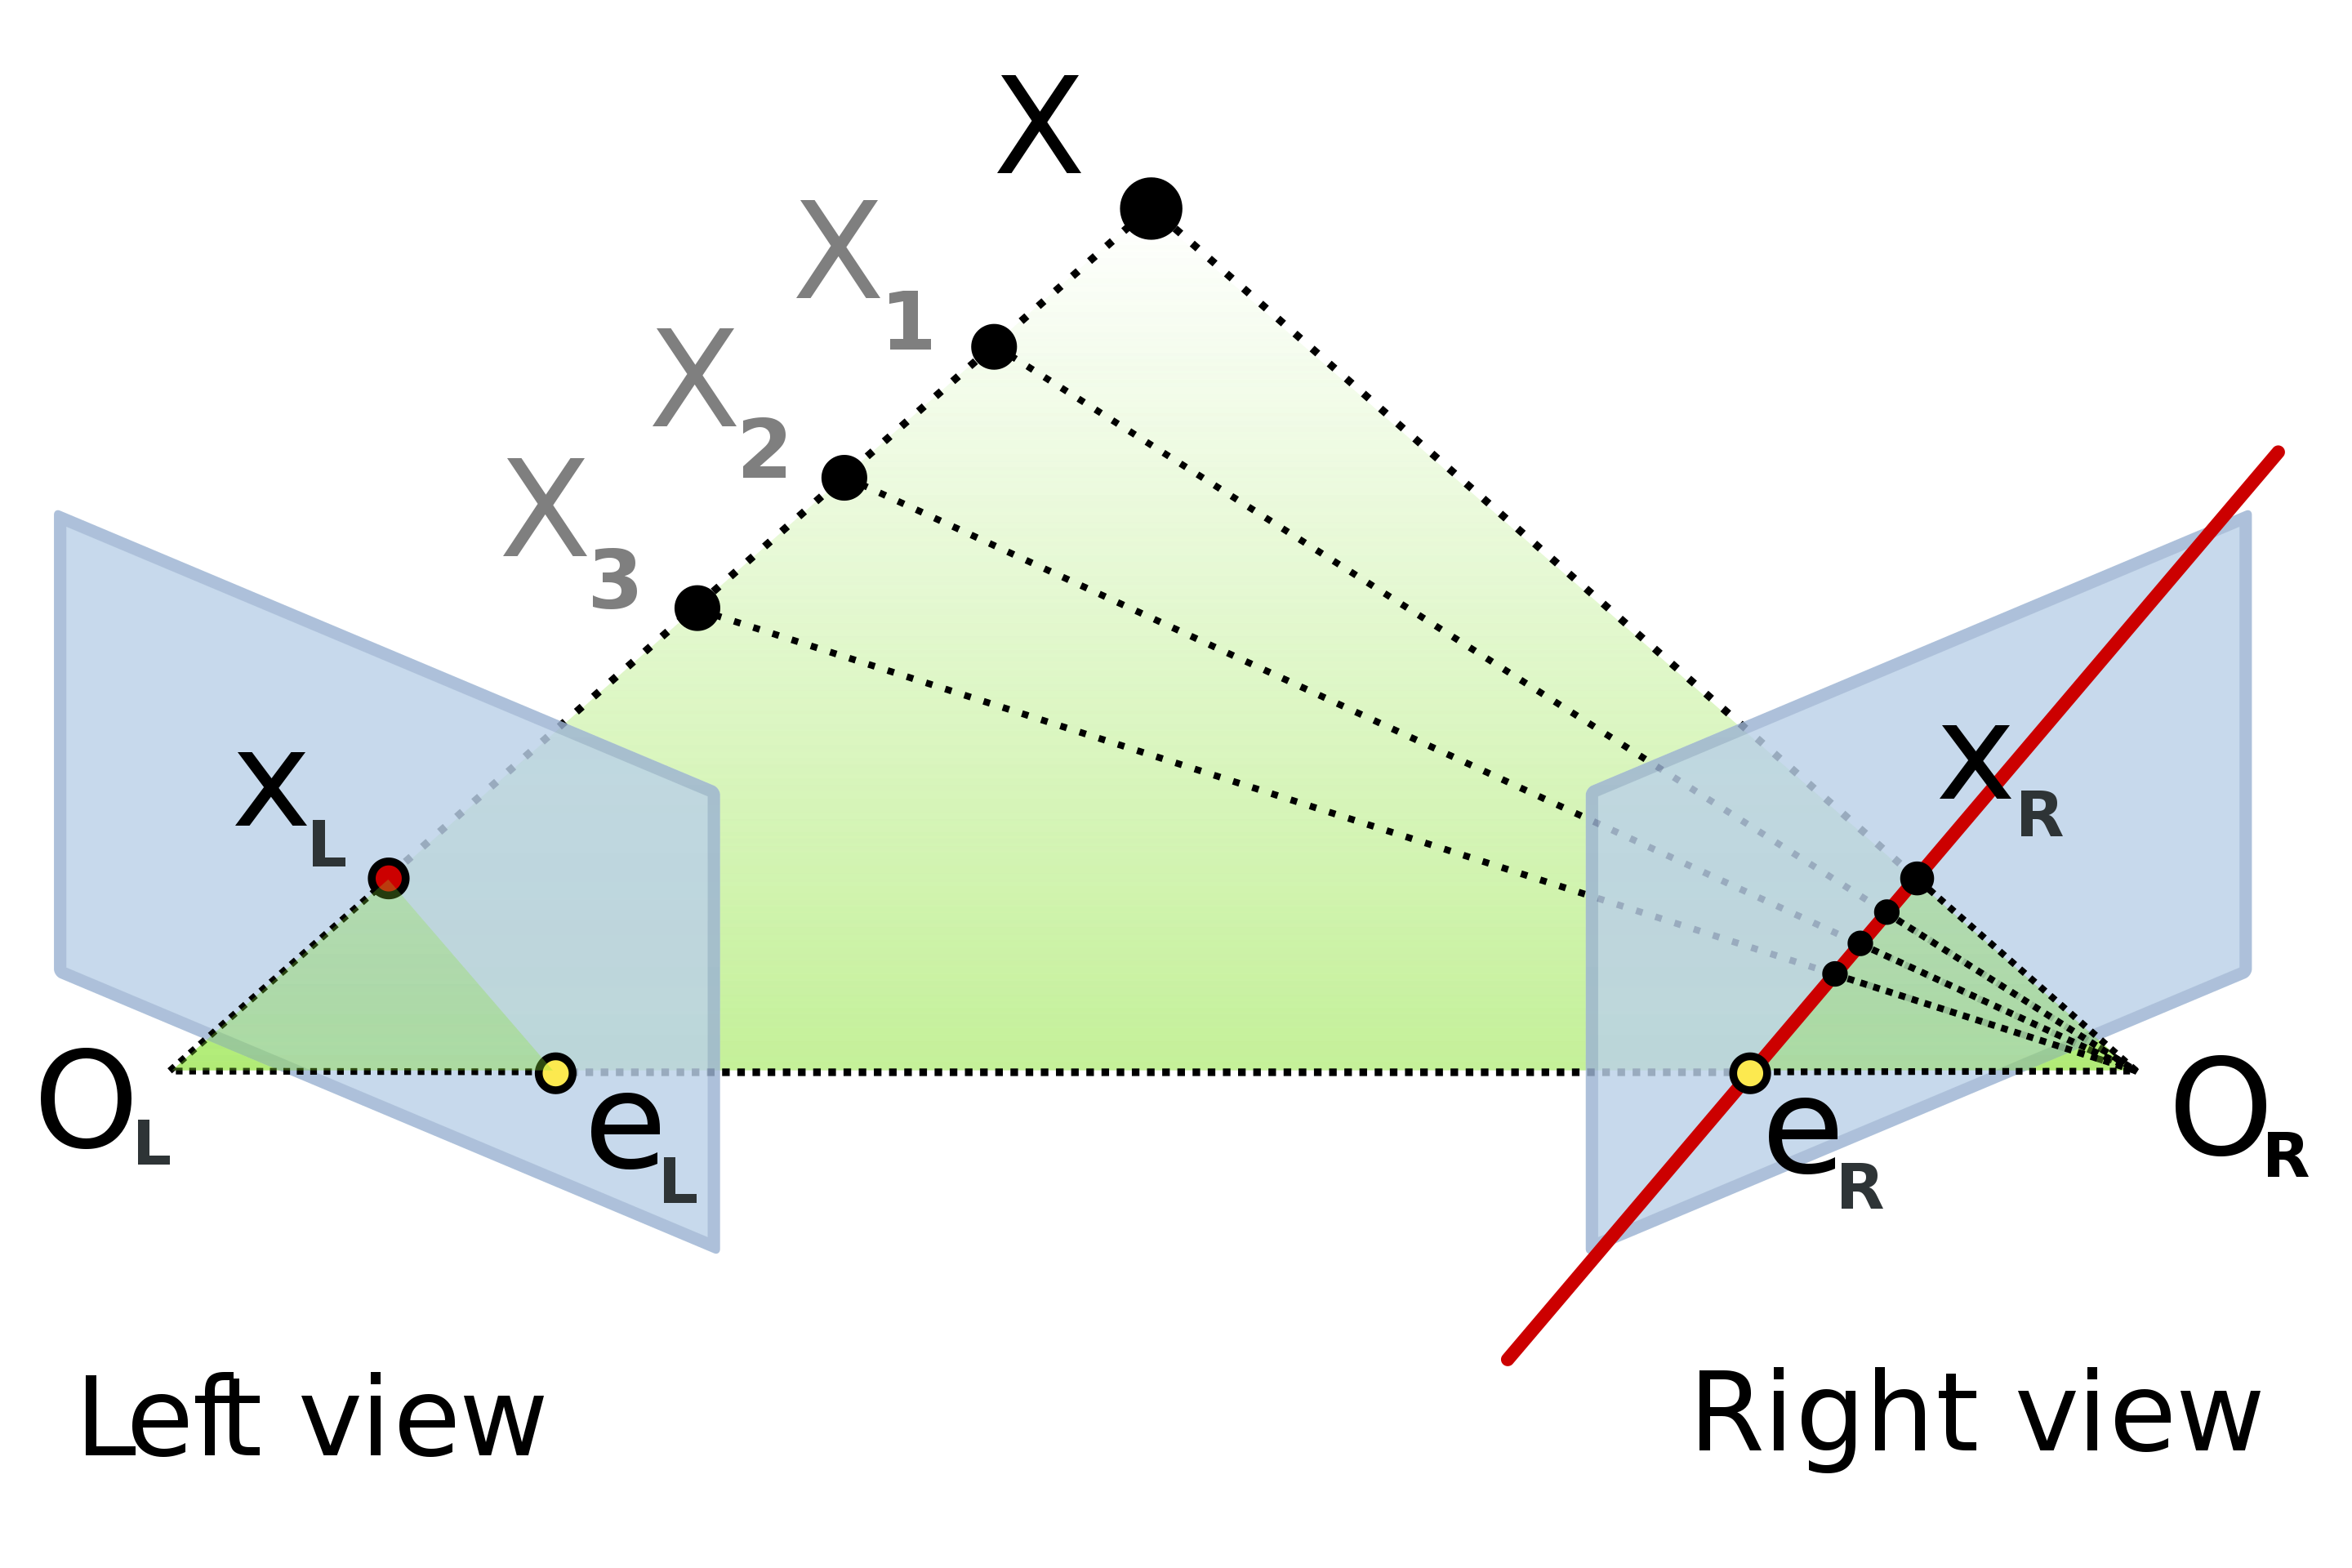 wikipedia

The point where the baseline meet is called the epipole on the image. (Here eL and eR). The green area is called the epipolar plane. The intersection of the image plane and the epipolar plane results in a line, the epipolar line, here in red. We then know that the corresponding points must be on that line. Using then known points allows us to find correspondences and the allowing us to match points.